<a href="https://colab.research.google.com/github/rewpak/AI-works/blob/main/Fuzzy_Systems_Risk_Assessment_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 5. Fuzzy Systems
# Task 5.2 Project Risk Assessment
## Problem Descriptions
The main task is to estimate the project's risk by considering both its funding and staffing.

we have 3 rules:

1. IF project funding is adequate
   
   OR project staffing is small
   
   THEN risk is low

2. IF project funding is marginal

   AND project staffing is large

   THEN risk is normal

3.  IF project funding is inadequate
    
  THEN risk is high

Membership functions of linguistic variables:

A1 (inadequate) = [0, 0, 30, 45]

A2 (marginal) = [30, 50, 70]

A3 (adequate) = [55, 70, 100, 100]

B1 (small) = [0, 0, 25, 65]

B2 (large) = [35, 75, 100, 100]

C1 (low) = [0, 0, 20, 40]

C2 (normal) = [25, 45, 55, 75]

C3 (high) = [60, 80, 100, 100]




## Implementation and Results

In [ ]:
!pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894079 sha256=5c64166d41f21da84a7d7fc388d039a540d0e33d099366ad7bc4707fe7ebf9c7
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


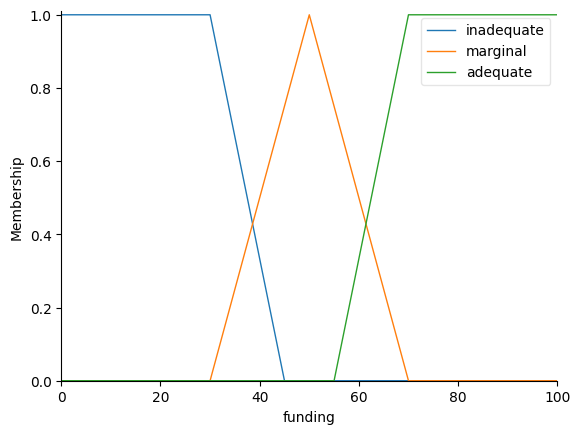

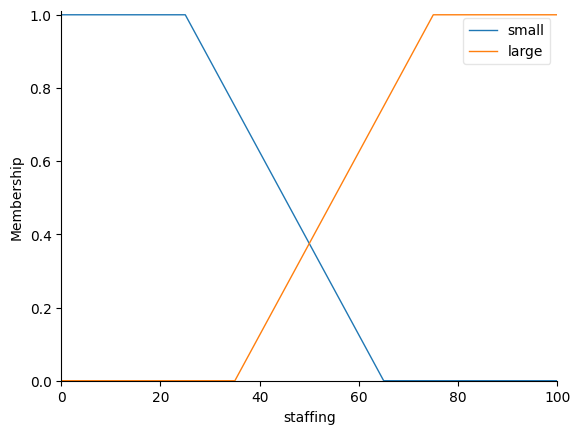

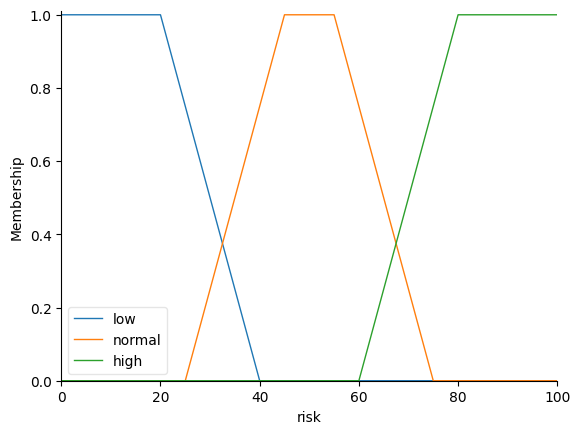

In [ ]:
# Linguistic variables for antecedents/consequent
funding = ctrl.Antecedent(np.arange(0, 101, 1), 'funding')
staffing = ctrl.Antecedent(np.arange(0, 101, 1), 'staffing')
risk = ctrl.Consequent(np.arange(0, 101, 1), 'risk')

# membership functions for each linguistic values
funding['inadequate'] = fuzz.trapmf(funding.universe, [0, 0, 30, 45])
funding['marginal'] = fuzz.trimf(funding.universe, [30, 50, 70])
funding['adequate'] = fuzz.trapmf(funding.universe, [55, 70, 100, 100])
staffing['small'] = fuzz.trapmf(staffing.universe, [0, 0, 25, 65])
staffing['large'] = fuzz.trapmf(staffing.universe, [35, 75, 100, 100])
risk['low'] = fuzz.trapmf(risk.universe, [0, 0, 20, 40])
risk['normal'] = fuzz.trapmf(risk.universe, [25, 45, 55, 75])
risk['high'] = fuzz.trapmf(risk.universe, [60, 80, 100, 100])

funding.view()
staffing.view()
risk.view()

In [ ]:
# Define the rules
rule1 = ctrl.Rule(funding['adequate'] | staffing['small'], risk['low'])
rule2 = ctrl.Rule(funding['marginal'] & staffing['large'], risk['normal'])
rule3 = ctrl.Rule(funding['inadequate'], risk['high'])
rule4 = ctrl.Rule(funding['inadequate'] & staffing['large'], risk['high'])

# Create the control system and its simulation
ctrl_sys = ctrl.ControlSystem([rule1, rule2, rule3])
ctrl_sys = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
ctrl_sim = ctrl.ControlSystemSimulation(ctrl_sys)

Project risk: 66.66529281135837 %


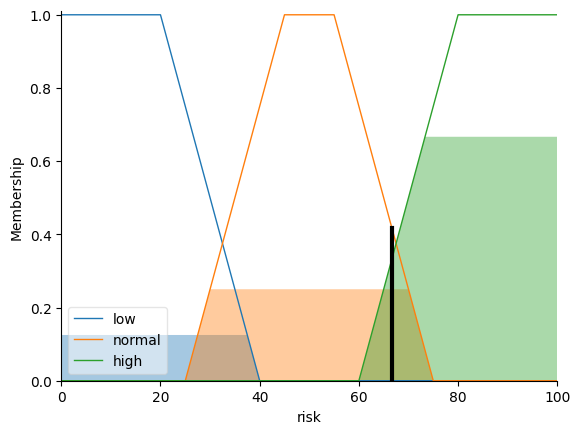

In [ ]:
# Pass inputs to the ControlSystem
ctrl_sim.inputs({'funding': 35, 'staffing': 60})

# Crunch the numbers
ctrl_sim.compute()
print("Project risk:", ctrl_sim.output['risk'], "%")
risk.view(sim=ctrl_sim)


## Discussions

The project risk assessment, based on a funding level of 35% and staffing at 60%, reveals a significant level of risk, with a calculated risk value of 66.67%

After implementing a new rule:

IF project funding is inadequate

AND project staffing is large

THEN risk is high

the result is not changed, because during the Aggregation μ(agg) we take the max values of μ(Cn). In our case, the values of Membership function C4 are smaller than C3. That is why adding a new rule didn't impact the result.  